In [1]:
!pip install seaborn

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Aaron Judge's Statcast data
judge = pd.read_csv(r'C:\Users\HP\Downloads\judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv(r'C:\Users\HP\Downloads\stanton.csv')

In [12]:
# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Display the last five rows of the Aaron Judge file

print(judge.tail())


     pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
3431         CH  2016-08-13           85.6        -1.9659         5.9113   
3432         CH  2016-08-13           87.6        -1.9318         5.9349   
3433         CH  2016-08-13           87.2        -2.0285         5.8656   
3434         CU  2016-08-13           79.7        -1.7108         6.1926   
3435         FF  2016-08-13           93.2        -1.8476         6.0063   

      player_name  batter  pitcher    events          description  spin_dir  \
3431  Aaron Judge  592450   542882       NaN                 ball       NaN   
3432  Aaron Judge  592450   542882  home_run  hit_into_play_score       NaN   
3433  Aaron Judge  592450   542882       NaN                 ball       NaN   
3434  Aaron Judge  592450   542882       NaN                 foul       NaN   
3435  Aaron Judge  592450   542882       NaN        called_strike       NaN   

      spin_rate_deprecated  break_angle_deprecated  break_length_dep

In [14]:
# All of Aaron Judge's batted ball events in 2017
judge_events_2017 = judge.loc[judge['game_year'] == 2017].events
print("Aaron Judge batted ball event totals, 2017:")
print(judge_events_2017.value_counts())

# All of Giancarlo Stanton's batted ball events in 2017
stanton_events_2017 = stanton.loc[stanton['game_year'] == 2017].events
print("\nGiancarlo Stanton batted ball event totals, 2017:")
print(stanton_events_2017.value_counts())

Aaron Judge batted ball event totals, 2017:
events
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
force_out                     11
intent_walk                   11
hit_by_pitch                   5
sac_fly                        4
fielders_choice_out            4
field_error                    4
triple                         3
strikeout_double_play          1
Name: count, dtype: int64

Giancarlo Stanton batted ball event totals, 2017:
events
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
intent_walk                   13
grounded_into_double_play     13
force_out                      7
hit_by_pitch                   7
field_error                    5
sac_fly

Text(0.5, 1.0, 'Giancarlo Stanton\nHome Runs, 2015-2017')

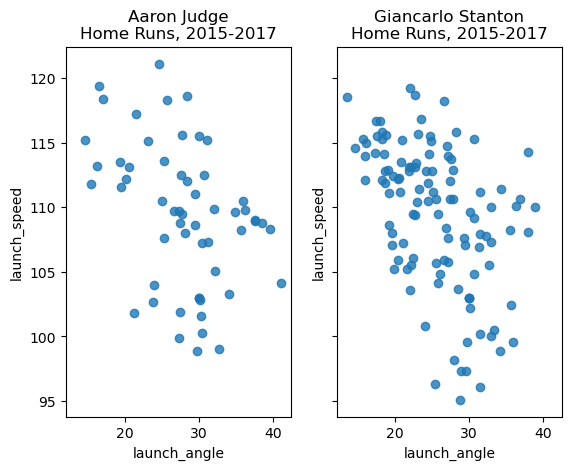

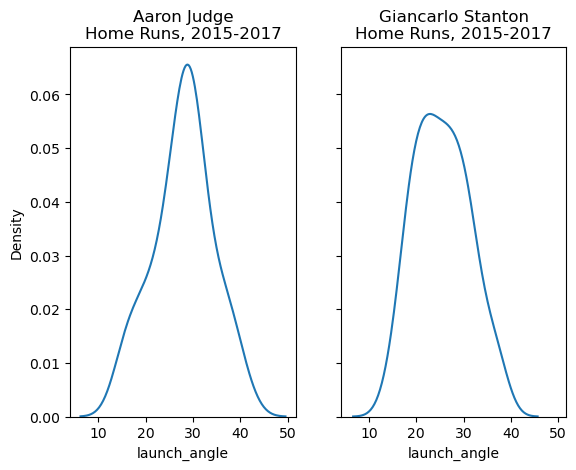

In [16]:
# Filter to include home runs only
judge_hr = judge[judge['events']=='home_run']
stanton_hr = stanton[stanton['events']=='home_run']

# Create a figure with two scatter plots of launch speed vs. launch angle, one for each player's home runs
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x='launch_angle', y='launch_speed', fit_reg=False, color='tab:blue', data=judge_hr, ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.regplot(x='launch_angle', y='launch_speed', fit_reg=False, color='tab:blue', data=stanton_hr, ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

# Create a figure with two KDE plots of launch speed vs. launch angle, one for each player's home runs
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_hr.launch_angle, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.kdeplot(stanton_hr.launch_angle,ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

Text(0.5, 1.0, 'Home Runs, 2015-2017')

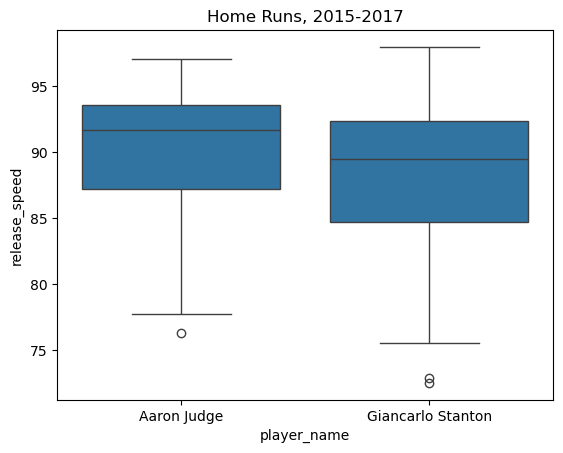

In [18]:
# Combine the Judge and Stanton home run DataFrames for easy boxplot plotting
judge_stanton_hr = pd.concat([judge_hr, stanton_hr])

# Create a boxplot that describes the pitch velocity of each player's home runs
sns.boxplot(x='player_name',y='release_speed', color='tab:blue', data=judge_stanton_hr).set_title('Home Runs, 2015-2017')

In [20]:
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3

In [24]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1

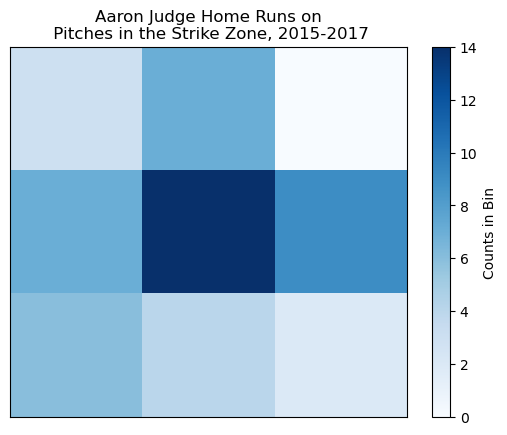

In [26]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(judge_strike_hr['zone_x'], judge_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

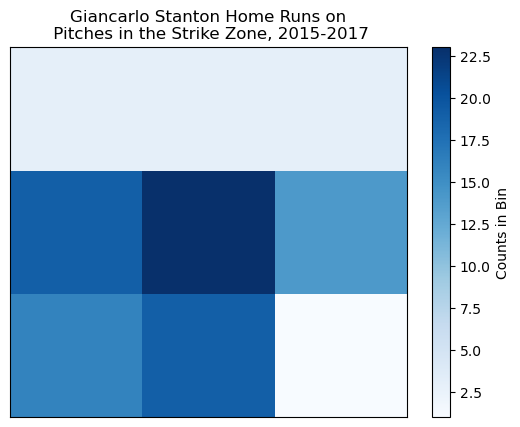

In [28]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
stanton_strike_hr = stanton_hr.copy().loc[stanton_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Stanton home runs
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis=1)

# Plot Stanton's home run zone as a 2D histogram with a colorbar
plt.hist2d(stanton_strike_hr['zone_x'], stanton_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

In [30]:
# Should opposing pitchers be wary of Aaron Judge and Giancarlo Stanton
should_pitchers_be_scared = True